In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_season = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\data_season.csv')
df = data_season.copy()
df.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


In [4]:
df.shape

(3158, 12)

In [5]:
df.isnull().sum()

Year            0
Location        0
Area            0
Rainfall        0
Temperature     0
Soil type      58
Irrigation      0
yeilds          0
Humidity        0
Crops           0
price           0
Season          0
dtype: int64

In [6]:
df['Soil type'] = df['Soil type'].fillna(df['Soil type'].mode()[0])

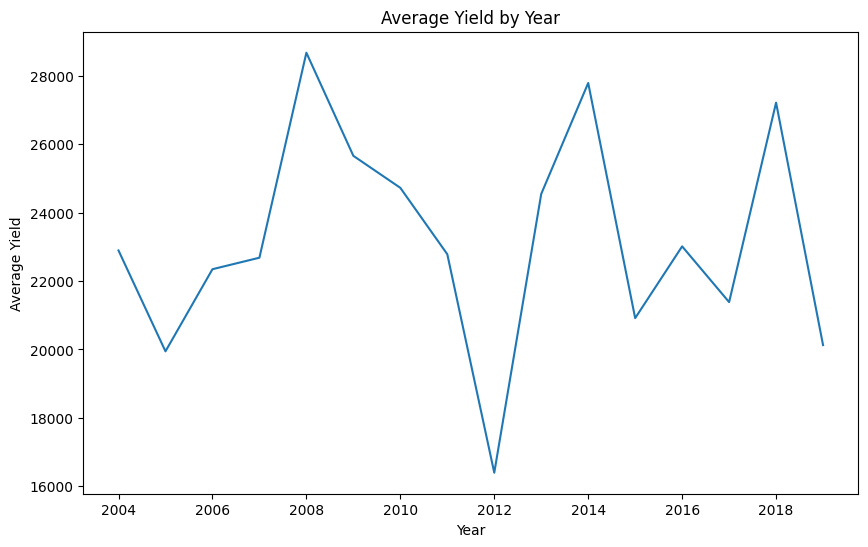

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='yeilds', ci=None)
plt.title('Average Yield by Year')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.show()

<Figure size 1400x600 with 0 Axes>

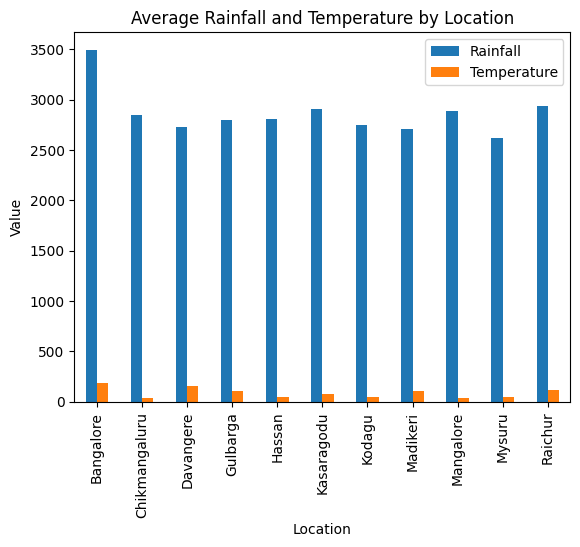

In [8]:
numeric_cols = ['Rainfall', 'Temperature']
plt.figure(figsize=(14, 6))
df.groupby('Location')[numeric_cols].mean().plot(kind='bar')
plt.title('Average Rainfall and Temperature by Location')
plt.xlabel('Location')
plt.ylabel('Value')
plt.show()

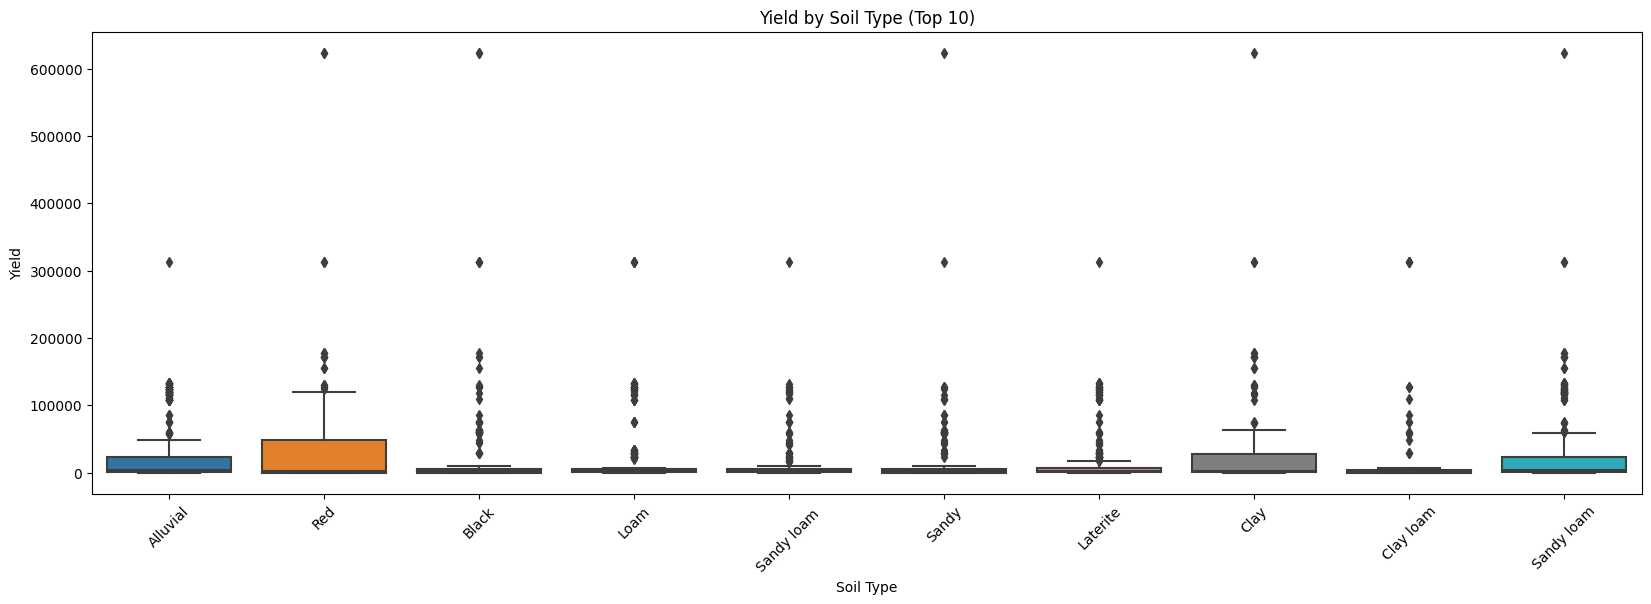

In [9]:
top_soil_types = df['Soil type'].value_counts().head(10).index
df_filtered = df[df['Soil type'].isin(top_soil_types)]

plt.figure(figsize=(20, 6))
sns.boxplot(data=df_filtered, x='Soil type', y='yeilds')
plt.title('Yield by Soil Type (Top 10)')
plt.xlabel('Soil Type')
plt.ylabel('Yield')
plt.xticks(rotation=45) 
plt.show()

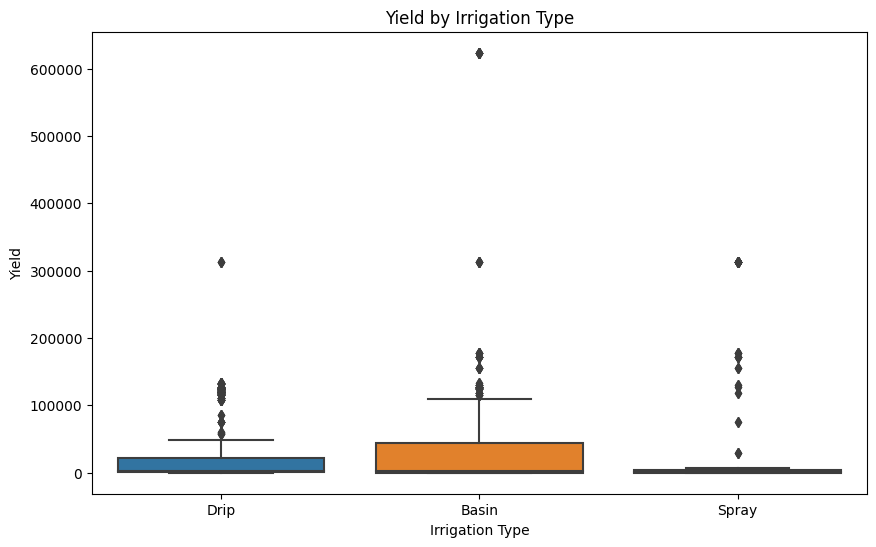

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Irrigation', y='yeilds')
plt.title('Yield by Irrigation Type')
plt.xlabel('Irrigation Type')
plt.ylabel('Yield')
plt.show()

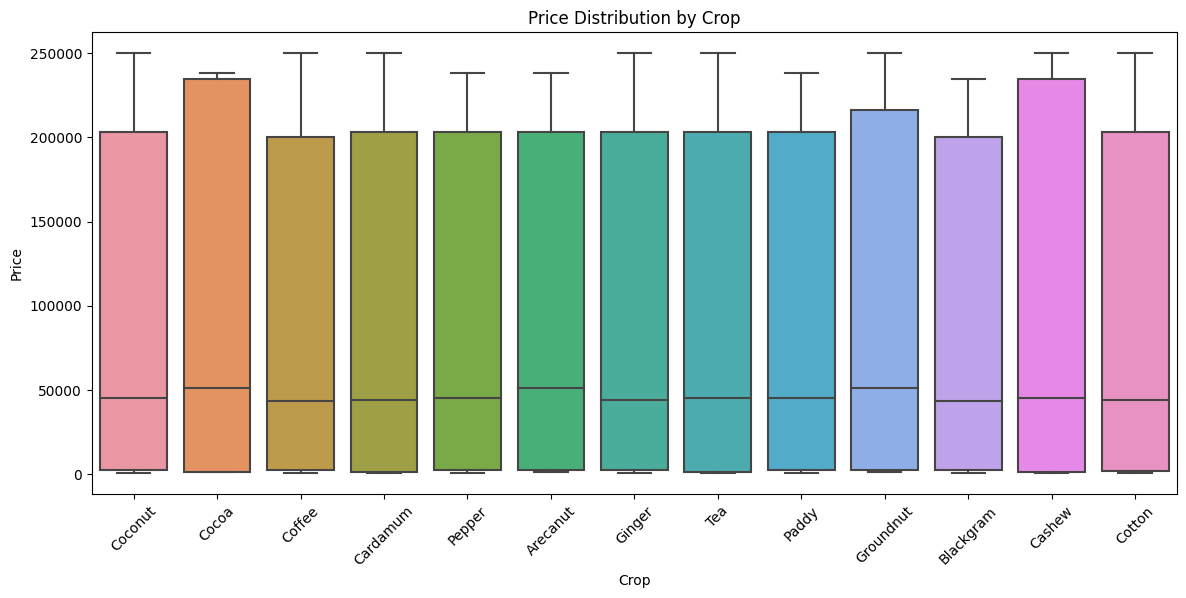

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Crops', y='price')
plt.title('Price Distribution by Crop')
plt.xlabel('Crop')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x600 with 0 Axes>

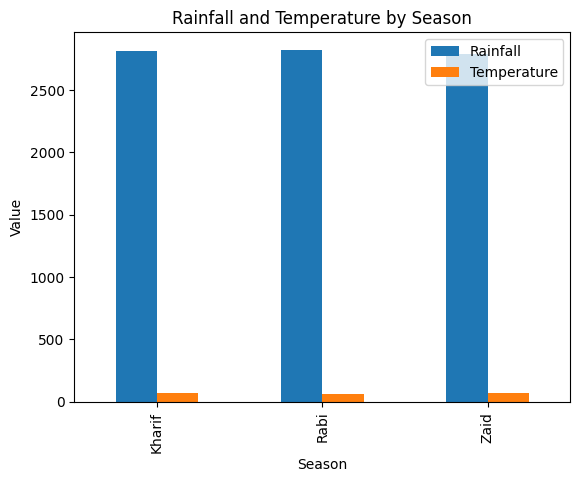

In [12]:
plt.figure(figsize=(14, 6))
df.groupby('Season')[numeric_cols].mean().plot(kind='bar')
plt.title('Rainfall and Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Value')
plt.show()

In [13]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Location
0 -> Bangalore
1 -> Chikmangaluru
2 -> Davangere
3 -> Gulbarga
4 -> Hassan
5 -> Kasaragodu
6 -> Kodagu
7 -> Madikeri
8 -> Mangalore
9 -> Mysuru
10 -> Raichur

Column: Soil type
0 -> Alluvial
1 -> Arid and Desert
2 -> Black
3 -> Black cotton
4 -> Clay
5 -> Clay loam
6 -> Drained loam
7 -> Dry sandy 
8 -> Gravelly sand
9 -> Heavy clay
10 -> Heavy cotton
11 -> Laterite
12 -> Light sandy
13 -> Loam
14 -> Medium textured 
15 -> Medium textured clay
16 -> Red
17 -> Red 
18 -> Red laterite
19 -> River basins
20 -> Sandy
21 -> Sandy clay loam
22 -> Sandy loam
23 -> Sandy loam 
24 -> Teelah
25 -> Well drained
26 -> loamy sand

Column: Irrigation
0 -> Basin
1 -> Drip
2 -> Spray

Column: Crops
0 -> Arecanut
1 -> Blackgram
2 -> Cardamum
3 -> Cashew
4 -> Cocoa
5 -> Coconut
6 -> Coffee
7 -> Cotton
8 -> Ginger
9 -> Groundnut
10 -> Paddy
11 -> Pepper
12 -> Tea

Column: Season
0 -> Kharif
1 -> Rabi
2 -> Zaid



In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('price',axis = 1)
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)

(2210, 11) (948, 11)


In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train),
y_pred = xgb_model.predict(X_test)

In [18]:
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {xgb_mse}")
print(f"R2 Score: {xgb_r2}")

Mean Squared Error: 7374624154.211238
R2 Score: 0.15120190042090598
